<a href="https://colab.research.google.com/github/Ram-IIITk/food_recomandation_jaccard_score_with_anvil/blob/main/Recommendation_jaccard_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.linalg import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import jaccard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/food/indian_food.csv")
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


# Clean data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
data[data['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [ ]:
data['region'] = data['region'].fillna('North')

In [ ]:
data[data['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
data = data[data['flavor_profile']!= '-1']

In [ ]:
data = data[data['region']!= '-1']

In [ ]:
data.drop("ingredients", axis=1, inplace=True)

In [ ]:
data.drop("prep_time", axis=1, inplace=True)

In [ ]:
data.drop("cook_time", axis=1, inplace=True)

In [ ]:
data.drop("state", axis=1, inplace=True)

In [ ]:
data

,name,diet,flavor_profile,course,region
0,Balu shahi,vegetarian,sweet,dessert,East
1,Boondi,vegetarian,sweet,dessert,West
2,Gajar ka halwa,vegetarian,sweet,dessert,North
3,Ghevar,vegetarian,sweet,dessert,West
4,Gulab jamun,vegetarian,sweet,dessert,East
...,...,...,...,...,...
250,Til Pitha,vegetarian,sweet,dessert,North East
251,Bebinca,vegetarian,sweet,dessert,West
252,Shufta,vegetarian,sweet,dessert,North
253,Mawa Bati,vegetarian,sweet,dessert,Central


# Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


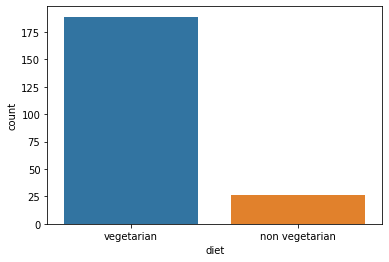

In [ ]:
sns.countplot(data['diet'],label = 'count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


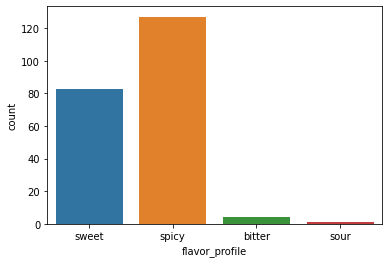

In [ ]:
sns.countplot(data['flavor_profile'],label = 'count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


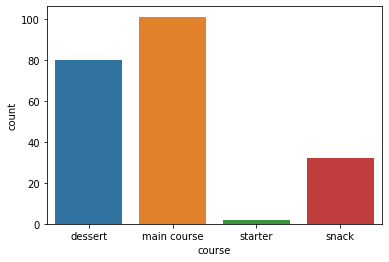

In [ ]:
sns.countplot(data['course'],label = 'count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


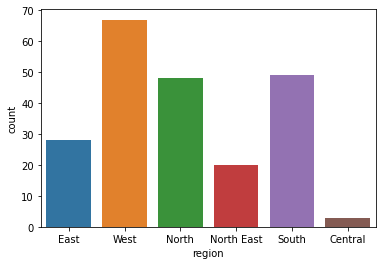

In [ ]:
sns.countplot(data['region'],label = 'count')

# prepare data

In [ ]:
data.set_index('name', inplace = True)

In [ ]:
data

,diet,flavor_profile,course,region
name,,,,
Balu shahi,vegetarian,sweet,dessert,East
Boondi,vegetarian,sweet,dessert,West
Gajar ka halwa,vegetarian,sweet,dessert,North
Ghevar,vegetarian,sweet,dessert,West
Gulab jamun,vegetarian,sweet,dessert,East
...,...,...,...,...
Til Pitha,vegetarian,sweet,dessert,North East
Bebinca,vegetarian,sweet,dessert,West
Shufta,vegetarian,sweet,dessert,North


In [ ]:
labelencoder = LabelEncoder()

In [ ]:
data['diet_val'] = labelencoder.fit_transform(data['diet'])

In [ ]:
data['flavor_profile_val'] = labelencoder.fit_transform(data['flavor_profile'])

In [ ]:
data['region_val'] = labelencoder.fit_transform(data['region'])

In [ ]:
data['course_val'] = labelencoder.fit_transform(data['course'])

In [ ]:
data.drop("diet", axis=1, inplace=True)

In [ ]:
data.drop("flavor_profile", axis=1, inplace=True)

In [ ]:
data.drop("course", axis=1, inplace=True)

In [ ]:
data.drop("region", axis=1, inplace=True)

In [ ]:
data['react'] = 'not reacted'

In [ ]:
data['selected'] = 0

In [ ]:
data['score'] = 0

In [ ]:
data['course_val'].unique()

array([0, 1, 3, 2])

In [ ]:
data_select = data[data['react']=='like']

In [ ]:
data

,diet_val,flavor_profile_val,region_val,course_val,react,selected,score
name,,,,,,,
Balu shahi,1,3,1,0,not reacted,0,0
Boondi,1,3,5,0,not reacted,0,0
Gajar ka halwa,1,3,2,0,not reacted,0,0
Ghevar,1,3,5,0,not reacted,0,0
Gulab jamun,1,3,1,0,not reacted,0,0
...,...,...,...,...,...,...,...
Til Pitha,1,3,3,0,not reacted,0,0
Bebinca,1,3,5,0,not reacted,0,0
Shufta,1,3,2,0,not reacted,0,0


# Model

In [ ]:
#def cosine_sim(A,B):
  #dist = np.dot(A,B)/(norm(A)*norm(B))
  #return dist

In [ ]:
def jaccard_score_fun(A,B):
  temp =[]
  for i in range(len(A)):
    if A[i] == B[i]:
      temp.append(1)
    else:
      temp.append(0)
  total = sum(temp)
  sim_val = total/len(A)
  return sim_val

In [ ]:
def like(food_name):
  var =['diet_val', 'flavor_profile_val','region_val','course_val']
  global data
  global data_select
  va = data[var]
  inputVec = data.loc[food_name,var].values
  data.loc[food_name,'react'] = 'like'
  data['new sim'] = va.apply(lambda x : jaccard_score_fun(inputVec,x.values ), axis=1)
  data['score'] = data['new sim'] + data['score']
  inp = data.loc[food_name]
  data.loc[food_name,'selected'] = 1
  data_select  = data_select.append(inp)
  data.drop(data[data['selected'] == 1].index, inplace = True)
  last_reacted = data_select.tail(4)
  return data.nlargest(columns='score',n=5),data.nlargest(columns='new sim',n=5)

In [ ]:
def dislike(food_name):
  var =['diet_val', 'flavor_profile_val','region_val','course_val']
  global data
  global data_select
  va = data[var]
  inputVec = data.loc[food_name,var].values
  data.loc[food_name,'react'] = 'dislike'
  data['new sim'] = va.apply(lambda x : jaccard_score_fun(inputVec,x.values ), axis=1)
  data['score'] =  data['score'] - data['new sim'] 
  inp = data.loc[food_name]
  data.loc[food_name,'selected'] = 1
  data_select  = data_select.append(inp)
  data.drop(data[data['selected'] == 1].index, inplace = True)
  last_reacted= data_select.tail(4)
  return data.nlargest(columns='score',n=5),data.nsmallest(columns='new sim',n=5)


In [ ]:
data

,diet_val,flavor_profile_val,region_val,course_val,react,selected,score
name,,,,,,,
Balu shahi,1,3,1,0,not reacted,0,0
Boondi,1,3,5,0,not reacted,0,0
Gajar ka halwa,1,3,2,0,not reacted,0,0
Ghevar,1,3,5,0,not reacted,0,0
Gulab jamun,1,3,1,0,not reacted,0,0
...,...,...,...,...,...,...,...
Til Pitha,1,3,3,0,not reacted,0,0
Bebinca,1,3,5,0,not reacted,0,0
Shufta,1,3,2,0,not reacted,0,0


In [ ]:
data_select

,diet_val,flavor_profile_val,region_val,course_val,react,selected,score
name,,,,,,,


# Frontend

In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 182 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=69b0e82fc71c66f1c56a186cd199d1518acd4e3a31f8dc0c0798cbb30b57bceb
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
import anvil.server
anvil.server.connect("EQHEDCR4FJ6BPDYHAK5YXZSI-M6CO6FRCRVANEKVL")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
@anvil.server.callable

def F_random():
  f_rand = data.sample(n = 1, axis = 0)
  f_rand_val = f_rand.index[0]
  return f_rand_val

@anvil.server.callable

def like_but(food_name):
  rec_score,rec_last = like(food_name)
  return rec_score.index.values ,rec_last.index.values,

@anvil.server.callable

def dislike_but(food_name):
  rec_score,rec_last =  dislike(food_name)
  return rec_score.index.values ,rec_last.index.values

In [ ]:
anvil.server.wait_forever()

KeyboardInterrupt: ignored